In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
sns.set()

# DATA description of narrowpeak files for log and quiescent states

In [2]:
data= open('Data/Condensin_peaks_Log.narrowPeak').readlines()

In [3]:
peak_lengths = []
for line in data:
    split_line = line.split('\t')
    peak_lengths.append(int(split_line[2])-int(split_line[1]))

/tmp/ipykernel_1572266/3256470635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(peak_lengths)


<AxesSubplot: ylabel='Density'>

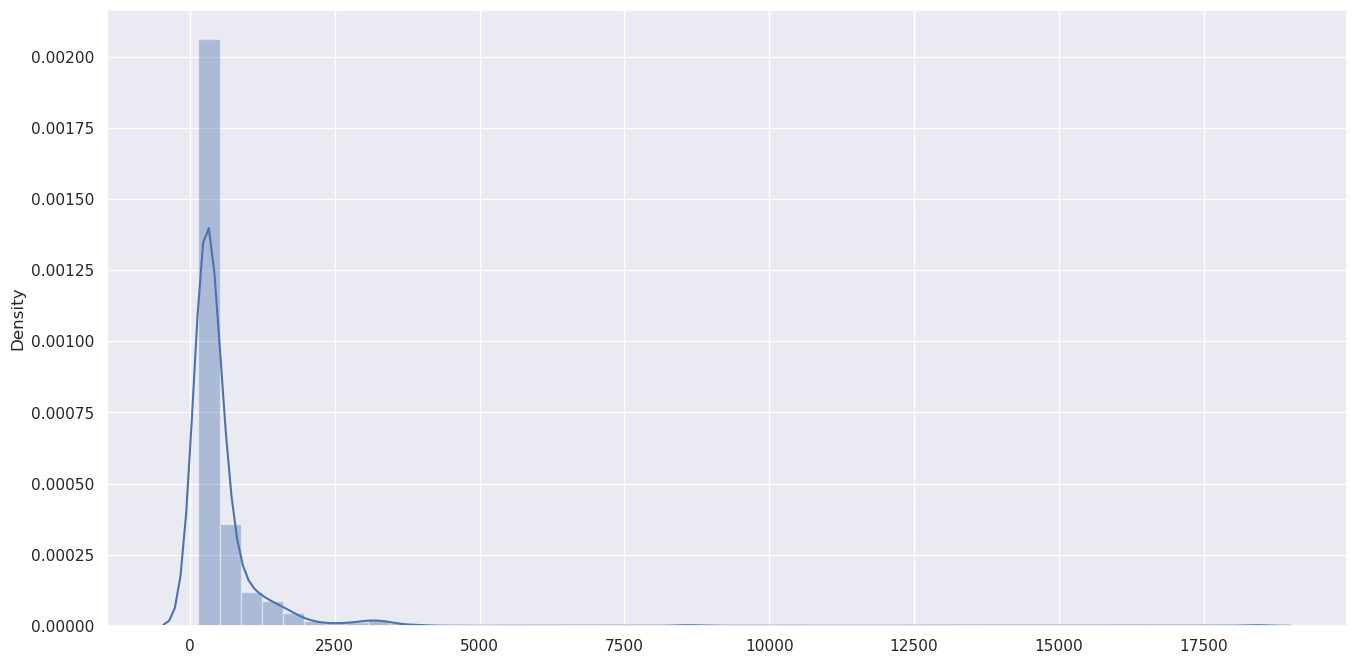

In [4]:
plt.figure(figsize=(16,8),dpi=100)
sns.distplot(peak_lengths)

In [5]:
pd.DataFrame(peak_lengths).describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,0
count,1006.000000
mean,516.074553
std,800.445672
min,147.000000
10%,177.000000
25%,226.000000
50%,320.000000
75%,506.250000
90%,1017.000000
95%,1519.250000


In [6]:
data= open('Data/Condensin_peaks_quiescence.narrowPeak').readlines()

In [7]:
peak_lengths = []
for line in data:
    split_line = line.split('\t')
    peak_lengths.append(int(split_line[2])-int(split_line[1]))

/tmp/ipykernel_1572266/3256470635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(peak_lengths)


<AxesSubplot: ylabel='Density'>

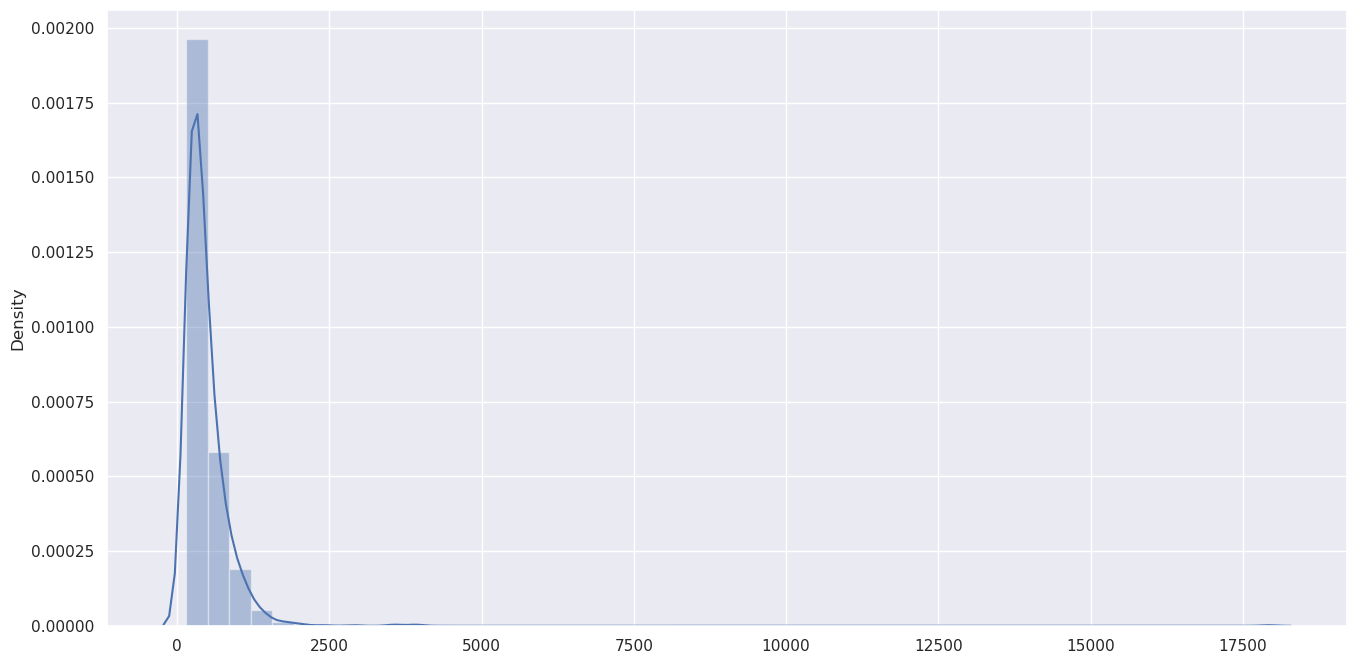

In [8]:
plt.figure(figsize=(16,8),dpi=100)
sns.distplot(peak_lengths)

In [9]:
pd.DataFrame(peak_lengths).describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,0
count,1688.000000
mean,471.428910
std,541.897518
min,147.000000
10%,184.000000
25%,245.750000
50%,367.500000
75%,565.000000
90%,845.300000
95%,1057.300000


# DATA description for Bed files and useful info for cross chromosome

In [26]:
genome = open('Data/S288C_reference_sequence_R64-3-1_20210421.fsa').read()
chromosomes_data = genome.split('>')[1:]
Chr_dict = {}
for chrom_data in chromosomes_data:
    ref = chrom_data.split('\n')[0].split(' ')[-1][1:-1]
    Chr_dict[ref]=''.join(chrom_data.split('\n')[1:])
Chr_dict['chromosome=Mito'] = Chr_dict.pop('top=circular')

# quiescence

In [27]:
data= open('Data/Condensin_peaks_quiescence.bed').readlines()

In [28]:
peak_chromosomes = {}
n_peaks = 0
for line in data:
    split_line = line.split('\t')
    peak_chromosomes[split_line[0]] = peak_chromosomes.get(split_line[0],0) + 1
    n_peaks+=1
n_peaks-=peak_chromosomes.pop('pombeIII')

Text(0.5, 1.0, 'Total number of peaks is 1673')

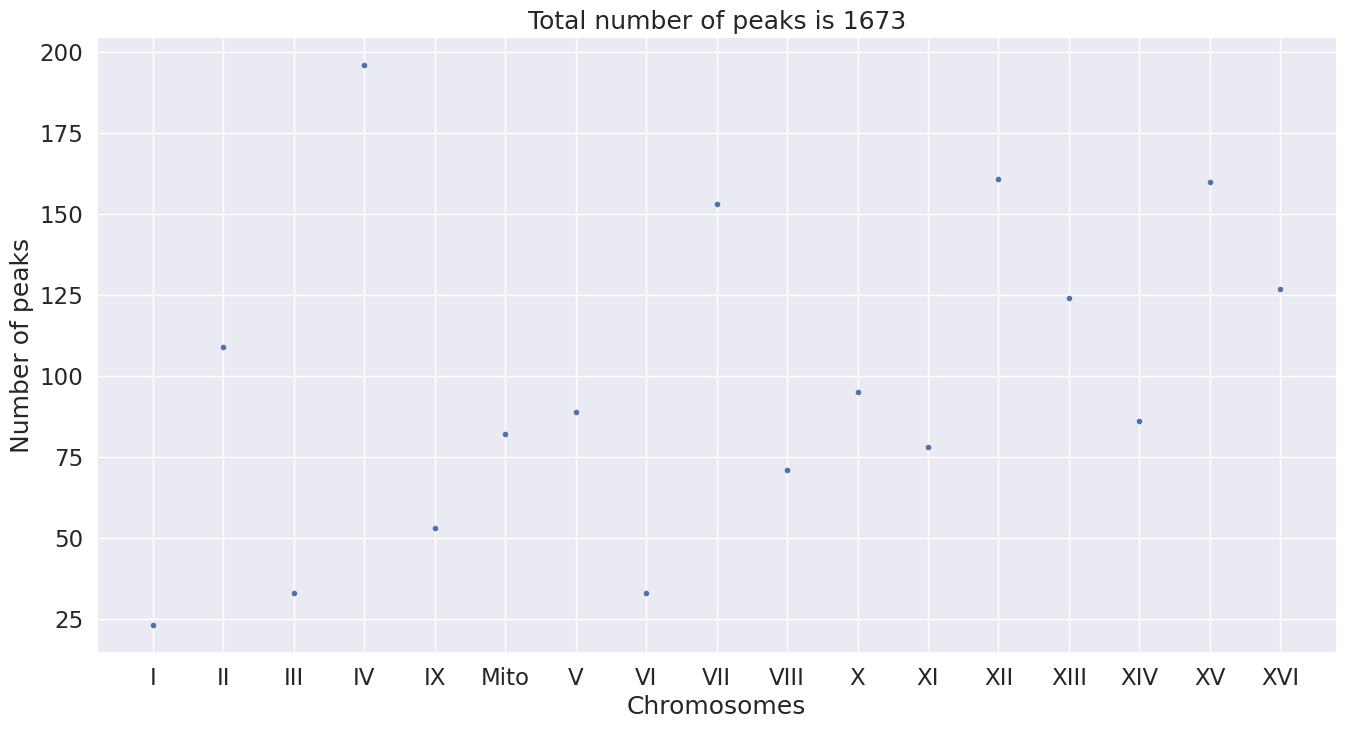

In [29]:
fig,ax=plt.subplots(figsize=(16,8))
ax.plot([peak_chromosomes[i] for i in peak_chromosomes],'.')
ax.set_xlabel('Chromosomes')
ax.set_ylabel('Number of peaks')
ax.set_xticks(np.arange(0,len(peak_chromosomes)))
ax.set_xticklabels([key for key in peak_chromosomes.keys()])
ax.set_title('Total number of peaks is %i'%n_peaks)

In [30]:
df = pd.DataFrame({'chrom':[s for s in peak_chromosomes.keys()],'length':[len(Chr_dict['chromosome={0}'.format(s)]) for s in peak_chromosomes.keys()],'npeaks':[peak_chromosomes[i] for i in peak_chromosomes]})
df.sort_values(by='length',ascending=True,inplace=True)

In [31]:
df

,chrom,length,npeaks
5,Mito,85779,82
0,I,230218,23
7,VI,270161,33
2,III,316620,33
4,IX,439888,53
9,VIII,562643,71
6,V,576874,89
11,XI,666816,78
10,X,745751,95
14,XIV,784333,86


In [32]:
import scipy
r,p=scipy.stats.pearsonr(df['npeaks'].values[1:],df['length'].values[1:])
r,p

(0.9835938989033964, 8.215038968635944e-12)

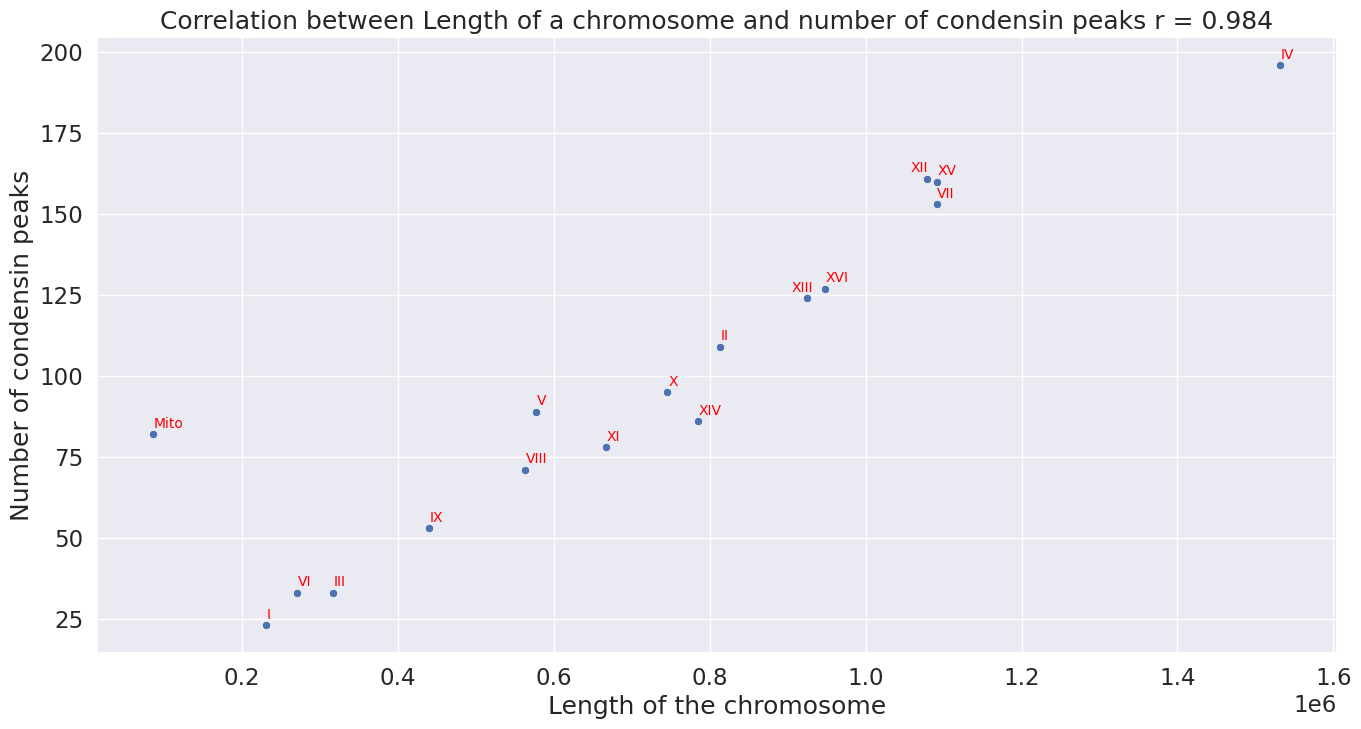

In [33]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,8))
sns.scatterplot(df,x='length',y='npeaks')
for i in range(df.shape[0]):
    if df.chrom[i] == 'XII':
        plt.text(x=df.length[i]-2*10**4,y=df.npeaks[i]+2,s=df.chrom[i], fontdict=dict(color='red',size=10))
    elif df.chrom[i] == 'XIII':
        plt.text(x=df.length[i]-2*10**4,y=df.npeaks[i]+2,s=df.chrom[i], fontdict=dict(color='red',size=10))
    else:
        plt.text(x=df.length[i]+10**3,y=df.npeaks[i]+2,s=df.chrom[i], fontdict=dict(color='red',size=10))
plt.title("Correlation between Length of a chromosome and number of condensin peaks r = %s"%round(r,3)) #title
plt.xlabel("Length of the chromosome") #x label
plt.ylabel("Number of condensin peaks") #y label
plt.show()

# Log

In [18]:
data= open('Data/Condensin_peaks_Log.bed').readlines()

In [19]:
peak_chromosomes = {}
n_peaks = 0
for line in data:
    split_line = line.split('\t')
    peak_chromosomes[split_line[0]] = peak_chromosomes.get(split_line[0],0) + 1
    n_peaks+=1
n_peaks-=peak_chromosomes.pop('pombeIII')

In [20]:
n_peaks

992

Text(0.5, 1.0, 'Total number of peaks is 992')

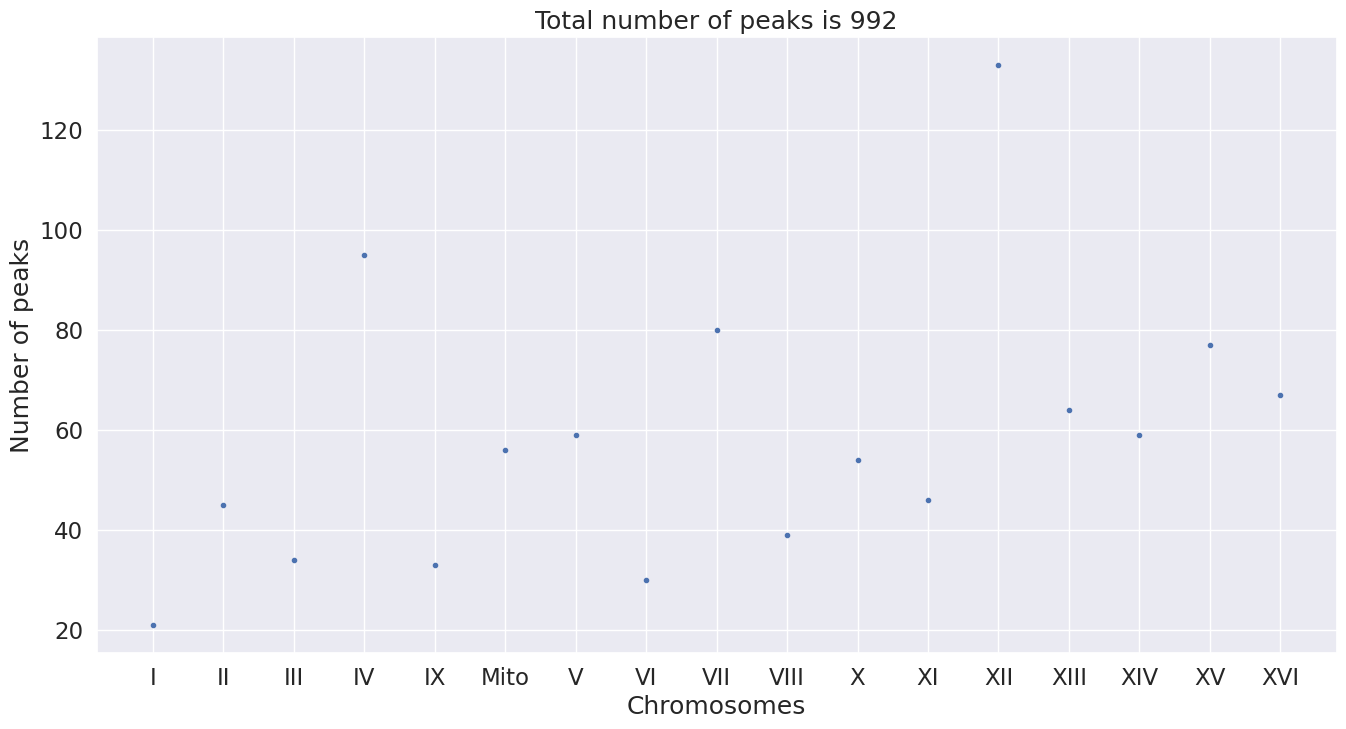

In [21]:
fig,ax=plt.subplots(figsize=(16,8))
ax.plot([peak_chromosomes[i] for i in peak_chromosomes],'.')
ax.set_xlabel('Chromosomes')
ax.set_ylabel('Number of peaks')
ax.set_xticks(np.arange(0,len(peak_chromosomes)))
ax.set_xticklabels([key for key in peak_chromosomes.keys()])
ax.set_title('Total number of peaks is %i'%n_peaks)

In [22]:
df = pd.DataFrame({'chrom':[s for s in peak_chromosomes.keys()],'length':[len(Chr_dict['chromosome={0}'.format(s)]) for s in peak_chromosomes.keys()],'npeaks':[peak_chromosomes[i] for i in peak_chromosomes]})
df.sort_values(by='length',ascending=True,inplace=True)

In [23]:
df

,chrom,length,npeaks
5,Mito,85779,56
0,I,230218,21
7,VI,270161,30
2,III,316620,34
4,IX,439888,33
9,VIII,562643,39
6,V,576874,59
11,XI,666816,46
10,X,745751,54
14,XIV,784333,59


In [24]:
import scipy
r,p=scipy.stats.pearsonr(df['npeaks'].values[1:],df['length'].values[1:])
r,p

(0.8300828132822051, 6.908597270150107e-05)

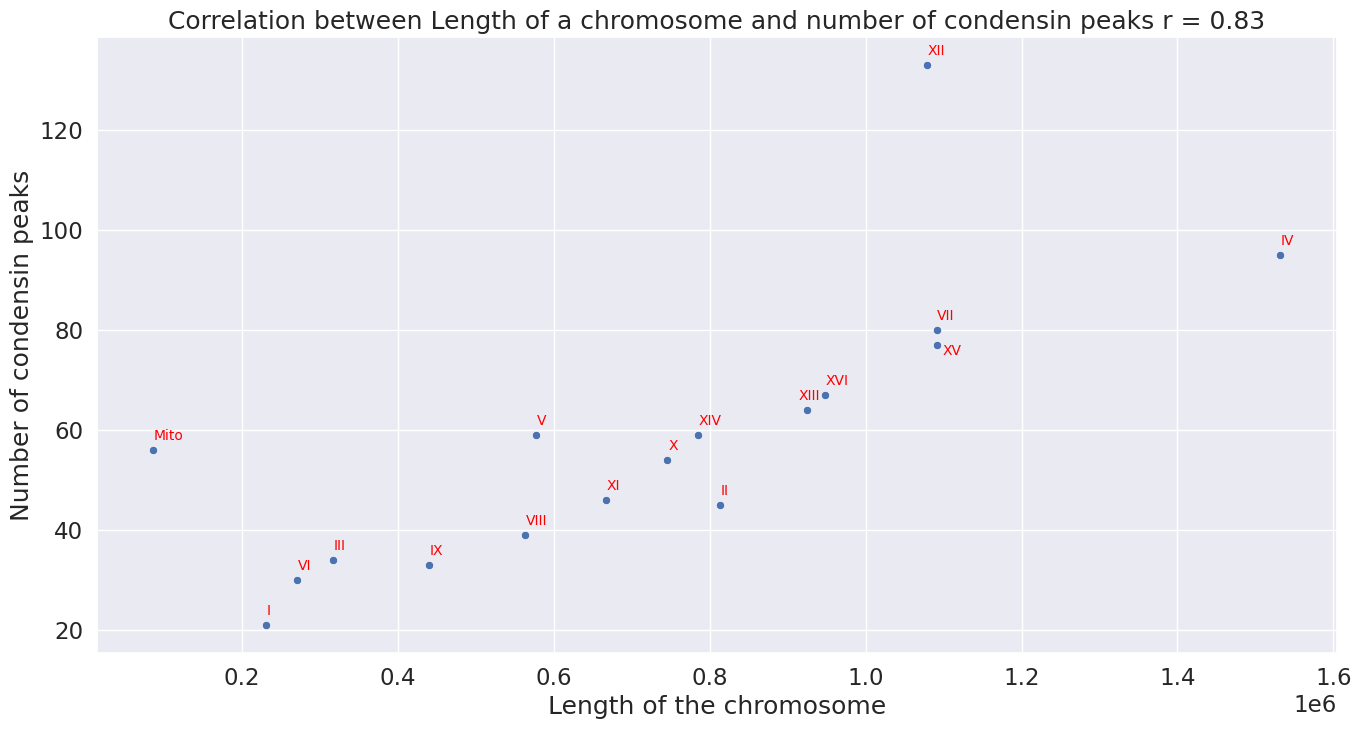

In [25]:
sns.set(font_scale=1.5)
plt.figure(figsize=(16,8))
sns.scatterplot(df,x='length',y='npeaks')
for i in range(df.shape[0]):
    if df.chrom[i] == 'XIII':
        plt.text(x=df.length[i]-10**4,y=df.npeaks[i]+2,s=df.chrom[i], fontdict=dict(color='red',size=10))
    elif df.chrom[i] == 'XV':
        plt.text(x=df.length[i]+7*10**3,y=df.npeaks[i]-2,s=df.chrom[i], fontdict=dict(color='red',size=10))
    else:
        plt.text(x=df.length[i]+10**3,y=df.npeaks[i]+2,s=df.chrom[i], fontdict=dict(color='red',size=10))
plt.title("Correlation between Length of a chromosome and number of condensin peaks r = %s"%round(r,3)) #title
plt.xlabel("Length of the chromosome") #x label
plt.ylabel("Number of condensin peaks") #y label
plt.show()